## Mini Project/Medical Data Visualizer

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

##### Read dataset

In [2]:
df = pd.read_csv('medical_examination.csv')

##### Dataset overview

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.shape

(70000, 13)

In [5]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

#### Add an `overweight` column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [6]:
bmi = df['weight']/(df['height']/100)**2
df['overweight'] = bmi.apply(lambda x : 1 if x > 25 else 0)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


#### Normalize the data by making 0 always good and 1 always bad. If the value of `cholesterol` or `gluc` is 1, make the value 0. If the value is more than 1, make the value 1.

In [7]:
df['cholesterol'] = df['cholesterol'].apply(lambda x : 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x : 0 if x == 1 else 1)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


#### Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'

In [8]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars = ['cholesterol','gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat.head()

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


#### Group and reformat the data to split it by 'cardio'. Show the counts of each feature. The dataset should be split by 'Cardio' so there is one chart for each `cardio` value. You will have to rename one of the columns for the catplot to work correctly.

In [9]:
df_cat = df_cat.groupby(['cardio', 'variable', 'value'])['value'].count().to_frame()
df_cat.rename(columns = {'value':'total'}, inplace=True)
df_cat = df_cat.reset_index()
df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


 ##### Draw the catplot with 'sns.catplot()'

<Figure size 576x576 with 0 Axes>

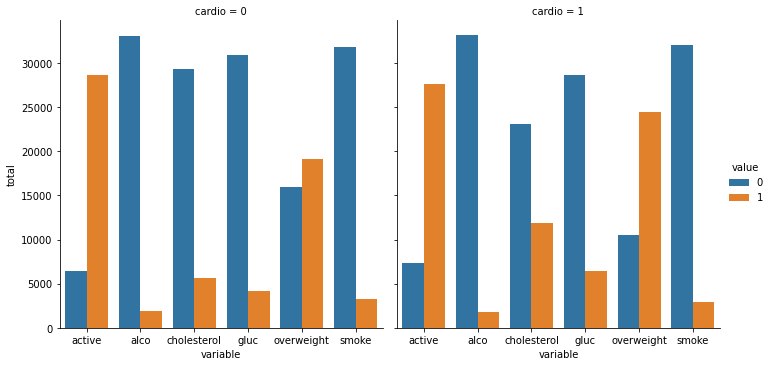

In [10]:
fig = plt.figure(figsize=(8,8))
sns.catplot(data = df_cat, x='variable', y='total', hue = 'value', col='cardio', kind="bar")
plt.show()

#### Clean the data. Filter out the following patient segments that represent incorrect data: diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
##### - height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
##### - height is more than the 97.5th percentile
##### - weight is less than the 2.5th percentile
##### - weight is more than the 97.5th percentile

In [11]:
df_heat = df[(df['ap_lo']<=df['ap_hi']) &
(df['height'] > df['height'].quantile(0.025)) & 
(df['height'] < df['height'].quantile(0.975)) &
(df['weight'] > df['weight'].quantile(0.025)) & 
(df['weight'] < df['weight'].quantile(0.975))
]

#### Create a correlation matrix using the dataset

In [12]:
corr = df_heat.corr()
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002729,0.004377,0.001933,0.000521,0.002985,0.001242,0.005434,0.003156,-0.001013,-0.000337,0.005460,0.003495,-0.000371
age,0.002729,1.000000,-0.014456,-0.073614,0.071584,0.020773,0.153222,0.128951,0.087772,-0.041309,-0.026526,-0.012390,0.238640,0.087890
gender,0.004377,-0.014456,1.000000,0.495362,0.119110,0.003407,0.060545,-0.035671,-0.021428,0.337767,0.167221,0.009287,0.004417,-0.049067
height,0.001933,-0.073614,0.495362,1.000000,0.235254,0.001723,0.015729,-0.060986,-0.031993,0.183795,0.083503,-0.002899,-0.022312,-0.143374
weight,0.000521,0.071584,0.119110,0.235254,1.000000,0.027688,0.226294,0.135992,0.104754,0.051647,0.056734,-0.012252,0.170488,0.664735
ap_hi,0.002985,0.020773,0.003407,0.001723,0.027688,1.000000,0.074573,0.024775,0.012198,-0.001730,0.000941,-0.000976,0.051512,0.019660
ap_lo,0.001242,0.153222,0.060545,0.015729,0.226294,0.074573,1.000000,0.149745,0.074249,0.024044,0.032555,0.002722,0.326482,0.171333
cholesterol,0.005434,0.128951,-0.035671,-0.060986,0.135992,0.024775,0.149745,1.000000,0.384432,0.013164,0.038219,0.001863,0.203077,0.125898
gluc,0.003156,0.087772,-0.021428,-0.031993,0.104754,0.012198,0.074249,0.384432,1.000000,-0.005085,0.013268,-0.010421,0.088879,0.085812
smoke,-0.001013,-0.041309,0.337767,0.183795,0.051647,-0.001730,0.024044,0.013164,-0.005085,1.000000,0.339767,0.026740,-0.020127,-0.001016


#### Create mask for the upper triangle

In [13]:
mask = np.triu(np.ones_like(corr))
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

#### Plot the correlation matrix using seaborn's heatmap()

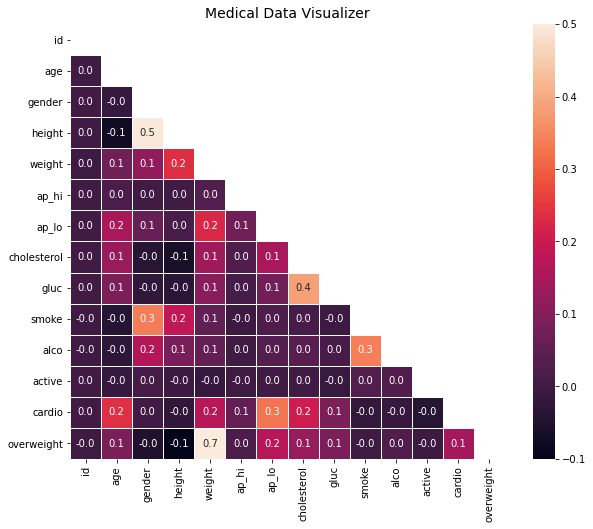

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data=corr, annot=True, mask=mask, ax=ax,square=True,linewidths=1, fmt=".1f", vmin=-0.1, vmax=0.5)
plt.title('Medical Data Visualizer', fontsize=14)
plt.show()